In [608]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [547]:
import warnings
warnings.filterwarnings('ignore')

In [562]:
tariffs = pd.read_parquet('../data/tariffs.gzip')

lows = np.array(tariffs.index[tariffs['tariff'] == 'Low'], dtype=np.datetime64)
normals = np.array(tariffs.index[tariffs['tariff'] == 'Normal'], dtype=np.datetime64)
highs = np.array(tariffs.index[tariffs['tariff'] == 'High'], dtype=np.datetime64)

In [150]:
%run 'functions.py'

In [426]:
error_test_smol = []
error_test_big = []
error_2013 = []
frac_PC = []
# what subset of the population
# what training size

In [855]:
# import the data
df2012 = pd.read_csv('~/Downloads/affluent_2012_treatment.csv')
df2013 = pd.read_csv('~/Downloads/affluent_2013_treatment.csv')

In [856]:
#looks like we might need to add an index
df2012['date'] = pd.to_datetime(df2012['DT']).dt.date
df2013['date'] = pd.to_datetime(df2013['DT']).dt.date

df2012.head()

,DT,kWh/hh,month,day_of_week,temp,date
0,2012-07-01 00:00:00,0.255085,7,6,11.00,2012-07-01
1,2012-07-01 01:00:00,0.215824,7,6,10.59,2012-07-01
2,2012-07-01 02:00:00,0.205891,7,6,10.09,2012-07-01
3,2012-07-01 03:00:00,0.202036,7,6,9.62,2012-07-01
4,2012-07-01 04:00:00,0.197018,7,6,9.80,2012-07-01


In [857]:
#looking at consumption values for 2012
# plt.plot(df2012['kWh/hh'].values[:120]);

In [858]:
#now we want to preprocess the data, I want a function that extracts, 
#for each the high, low, and average temperature for each day

#I also want to do pca on the 24 hour energy consumption, extract the first 4-5
#compoenents or so and then predict these with the month and the day of the week

#let's try the mean

df_avg_temp_2012 = pd.Series(df2012.groupby(['date'])['temp'].mean(), name="mean temp")
df_min_temp_2012 = pd.Series(df2012.groupby(['date'])['temp'].min(), name="min temp")
df_max_temp_2012 = pd.Series(df2012.groupby(['date'])['temp'].max(), name="max temp")

df_day_of_week_2012 = df2012.groupby(['date'])['day_of_week'].max()
df_month_2012 = df2012.groupby(['date'])['month'].max()

df_2012_processed = pd.concat([df_avg_temp_2012, df_min_temp_2012, df_max_temp_2012, 
                               df_day_of_week_2012, df_month_2012], axis=1)



df_avg_temp_2013 = pd.Series(df2013.groupby(['date'])['temp'].mean(), name="mean temp")
df_min_temp_2013 = pd.Series(df2013.groupby(['date'])['temp'].min(), name="min temp")
df_max_temp_2013 = pd.Series(df2013.groupby(['date'])['temp'].max(), name="max temp")
df_day_of_week_2013 = df2013.groupby(['date'])['day_of_week'].max()
df_month_2013 = df2013.groupby(['date'])['month'].max()

df_2013_processed = pd.concat([df_avg_temp_2013, df_min_temp_2013, df_max_temp_2013,
                               df_day_of_week_2013, df_month_2013], axis=1)

df_2013_processed.head()

,mean temp,min temp,max temp,day_of_week,month
date,,,,,
2013-07-01,15.433333,11.40,19.47,0,7
2013-07-02,14.662083,9.75,19.54,1,7
2013-07-03,16.400417,12.60,19.94,2,7
2013-07-04,16.989583,10.00,23.28,3,7
2013-07-05,17.295000,10.80,23.24,4,7


In [859]:
# how many PCs to keep
n=1

In [860]:
#what are the ys here:

y2012 = df2012['kWh/hh'].values.reshape((-1,24))

# from sklearn.decomposition import PCA

# pca = PCA(n_components = 4)

#let's do PCA by hand:

u, s, vh = np.linalg.svd(y2012.T.dot(y2012))

#extract the first 5 principal components:

prin_comp = vh[:n,:]

#project the y data down:


# matrix of 184*4 (PCs)
y_red_2012 = y2012.dot(prin_comp.T)
# all the temp, etc data as a matrix
X_2012 = df_2012_processed.values

In [861]:
# frac_PC.append((s[:n][-1])/s[0])

In [862]:
# plt.plot(s[:4], '-o')
# plt.title('Singular values for matrix of days of 2012 by hour level data')
# plt.savefig('../figs/SVs_random_forrest.png');

In [863]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RF

from sklearn.model_selection import GridSearchCV


# X_train, X_test, y_train, y_test = train_test_split(X_2012, y_red_2012, test_size=.2, random_state=42)
X_train = X_2012
y_train = y_red_2012

In [864]:
rf_reg = RF()

rf_reg.fit(X_train, y_train)

# predit
# y_test_red_pred = rf_reg.predict(X_test)

RandomForestRegressor()

In [865]:
# plt.figure()
# plt.plot(y_test[:, 0],label = 'real values')
# plt.plot(y_test_red_pred[:, 0],label = 'predicted values')
# plt.legend()
# plt.show()

In [866]:
# y_test_red_pred = y_test_red_pred.reshape(-1,1)

In [867]:
# y_test_pred = prin_comp.T.dot(y_test_red_pred.T).T.flatten()
# y_test_big = prin_comp.T.dot(y_test.T).T.flatten()

In [868]:
# round(((y_test[:, 0] - y_test_pred[:, 0])/y_test[:, 0]).mean()*100, 2)

In [869]:
# print(round(((y_test.flatten() - y_test_red_pred.flatten())/y_test.flatten()).mean()*100, 2))

In [870]:
# print(round(((y_test_big - y_test_pred)/y_test_big).mean()*100, 2))

In [871]:
#alright, can we optimize the parameters of the regressor

# rf_reg = RF()

param_grid = {'n_estimators':[70+5*i for i in range(10)],'max_depth':[4+9*i for i in range(10)]}

search = GridSearchCV(rf_reg,param_grid,cv = 5)

search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 13, 22, 31, 40, 49, 58, 67, 76, 85],
                         'n_estimators': [70, 75, 80, 85, 90, 95, 100, 105, 110,
                                          115]})

In [872]:
search.best_params_

{'max_depth': 67, 'n_estimators': 110}

In [873]:
best_est = search.best_estimator_

In [874]:
#let's predict the values for 2013

X_2013 = df_2013_processed.values
#dim = 184*4
y_2013_red_predict = best_est.predict(X_2013)

In [875]:
y_2013_red_predict = y_2013_red_predict.reshape(-1,1)

In [876]:
# reconstruct the 24 hour values
# prin_comp is of dimension 4*24
# (24*4 * 4*184).T

y_2013_predictions = prin_comp.T.dot(y_2013_red_predict.T).T.flatten()
df2013['pred'] = y_2013_predictions

In [877]:
df2013['DT'] = df2013['DT'].astype('datetime64[ns]')

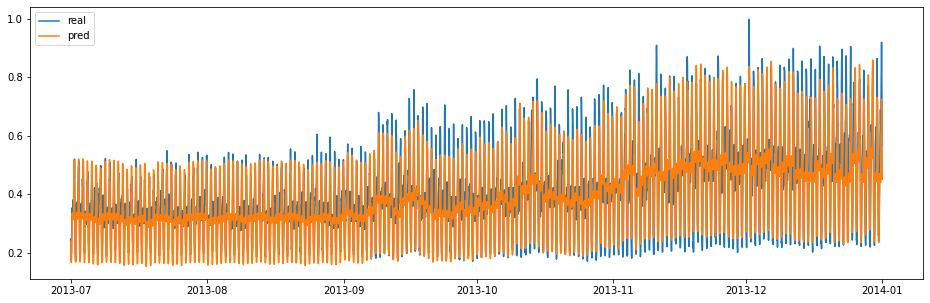

In [878]:
# affluent
plt.figure(figsize=(16, 5))
t=len(df2013)
plt.plot(df2013['DT'][:t], df2013['kWh/hh'][:t], label='real')
plt.plot(df2013['DT'][:t], df2013['pred'][:t], label='pred')
plt.legend()
plt.show()

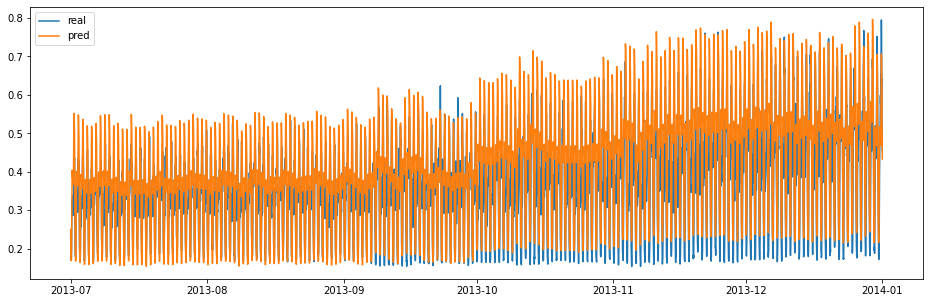

In [823]:
# comfortable 
plt.figure(figsize=(16, 5))
t=len(df2013)
plt.plot(df2013['DT'][:t], df2013['kWh/hh'][:t], label='real')
plt.plot(df2013['DT'][:t], df2013['pred'][:t], label='pred')
plt.legend()
plt.show()

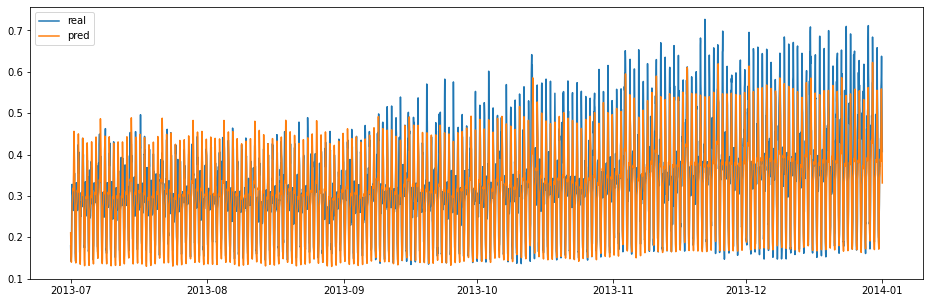

In [851]:
# adversity
plt.figure(figsize=(16, 5))
t=len(df2013)
plt.plot(df2013['DT'][:t], df2013['kWh/hh'][:t], label='real')
plt.plot(df2013['DT'][:t], df2013['pred'][:t], label='pred')
plt.legend()
plt.show()

In [723]:
# ME_consumption = pd.DataFrame([], index=['Affluent', 'Comfortable', 'Adversity'], columns=['Low', 'Normal', 'High', 'Overall'])
# MPE_consumption = pd.DataFrame([], index=['Affluent', 'Comfortable', 'Adversity'], columns=['Low', 'Normal', 'High', 'Overall'])

In [879]:
ME_consumption.loc['Affluent', 'Low'], MPE_consumption.loc['Affluent', 'Low'] = get_me_mpe(df2013, lows)

ME_consumption.loc['Affluent', 'Normal'], MPE_consumption.loc['Affluent', 'Normal'] = get_me_mpe(df2013, normals)

ME_consumption.loc['Affluent', 'High'], MPE_consumption.loc['Affluent', 'High'] = get_me_mpe(df2013, highs)

ME_consumption.loc['Affluent', 'Overall'], MPE_consumption.loc['Affluent', 'Overall'] = get_me_mpe(df2013, df2013['DT'])

# ME_consumption.loc['Comfortable', 'Low'], MPE_consumption.loc['Comfortable', 'Low'] = get_me_mpe(df2013, lows)

# ME_consumption.loc['Comfortable', 'Normal'], MPE_consumption.loc['Comfortable', 'Normal'] = get_me_mpe(df2013, normals)

# ME_consumption.loc['Comfortable', 'High'], MPE_consumption.loc['Comfortable', 'High'] = get_me_mpe(df2013, highs)

# ME_consumption.loc['Comfortable', 'Overall'], MPE_consumption.loc['Comfortable', 'Overall'] = get_me_mpe(df2013, df2013['DT'])

# ME_consumption.loc['Adversity', 'Low'], MPE_consumption.loc['Adversity', 'Low'] = get_me_mpe(df2013, lows)

# ME_consumption.loc['Adversity', 'Normal'], MPE_consumption.loc['Adversity', 'Normal'] = get_me_mpe(df2013, normals)

# ME_consumption.loc['Adversity', 'High'], MPE_consumption.loc['Adversity', 'High'] = get_me_mpe(df2013, highs)

# ME_consumption.loc['Adversity', 'Overall'], MPE_consumption.loc['Adversity', 'Overall'] = get_me_mpe(df2013, df2013['DT'])

In [612]:
def get_me_mpe(df, group):
    cut = df.loc[df['DT'].isin(group)]
    me = (cut['kWh/hh'] - cut['pred']).mean()
    mpe = ((cut['kWh/hh'] - cut['pred'])/cut['kWh/hh']).mean()*100
    return me, mpe

In [880]:
ME_consumption = ME_consumption.astype(float)
MPE_consumption = MPE_consumption.astype(float)

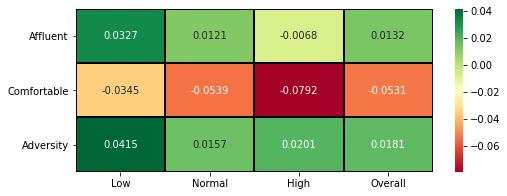

In [881]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(ME_consumption, annot=True, fmt='.4f', linewidths=1, linecolor='black', cmap='RdYlGn', ax=ax);
# ax.set_title(r'Mean treatment effect for second half of'
#              '\n'
#              r'2013 - RFR trained per socio-economic group')
# plt.tight_layout()
# plt.savefig('../figs/ME_consumption_rfr.png')

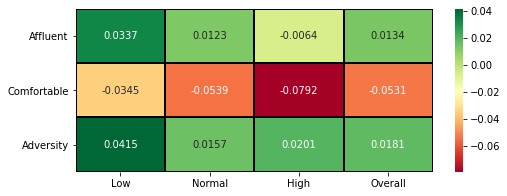

In [853]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(ME_consumption, annot=True, fmt='.4f', linewidths=1, linecolor='black', cmap='RdYlGn', ax=ax);
# ax.set_title(r'Mean treatment effect for second half of'
#              '\n'
#              r'2013 - RFR trained per socio-economic group')
# plt.tight_layout()
# plt.savefig('../figs/ME_consumption_rfr.png')

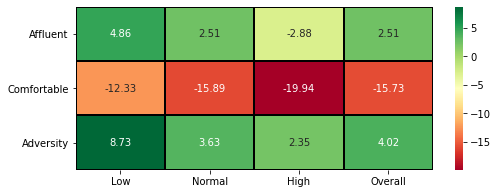

In [882]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(MPE_consumption, annot=True, fmt='.2f', linewidths=1, linecolor='black', cmap='RdYlGn', ax=ax);
# ax.set_title(r'Mean percent treatment effect for second half of'
#              '\n'
#              r'2013 - RFR trained per socio-economic group')
# plt.tight_layout()
# plt.savefig('../figs/MPE_consumption_rfr.png')

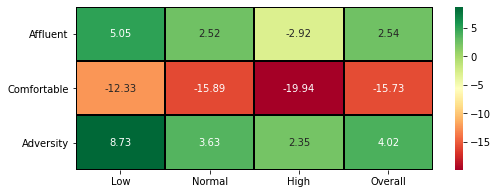

In [854]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(MPE_consumption, annot=True, fmt='.2f', linewidths=1, linecolor='black', cmap='RdYlGn', ax=ax);
# ax.set_title(r'Mean percent treatment effect for second half of'
#              '\n'
#              r'2013 - RFR trained per socio-economic group')
# plt.tight_layout()
# plt.savefig('../figs/MPE_consumption_rfr.png')

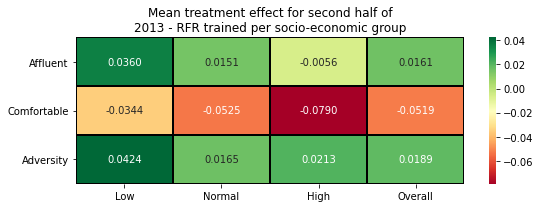

In [758]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(ME_consumption, annot=True, fmt='.4f', linewidths=1, linecolor='black', cmap='RdYlGn', ax=ax);
# ax.set_title(r'Mean treatment effect for second half of'
#              '\n'
#              r'2013 - RFR trained per socio-economic group')
# plt.tight_layout()
# plt.savefig('../figs/ME_consumption_rfr.png')

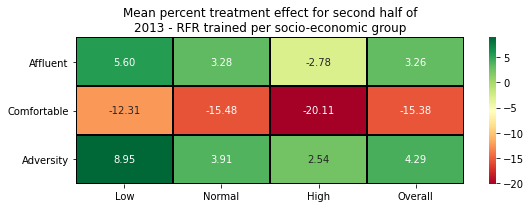

In [759]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(MPE_consumption, annot=True, fmt='.2f', linewidths=1, linecolor='black', cmap='RdYlGn', ax=ax)
ax.set_title(r'Mean percent treatment effect for second half of'
             '\n'
             r'2013 - RFR trained per socio-economic group')
plt.tight_layout()
plt.savefig('../figs/MPE_consumption_rfr.png')

In [525]:
# plt.figure()
# plt.plot(y_2013[400:500],label = "true values 2013")
# plt.plot(y_2013_predictions[400:500],label = 'predicted values 2013')
# plt.legend()
# plt.show()

In [526]:
error_2013.append(round(((y_2013 - y_2013_predictions)/y_2013).mean()*100, 2))

0.46

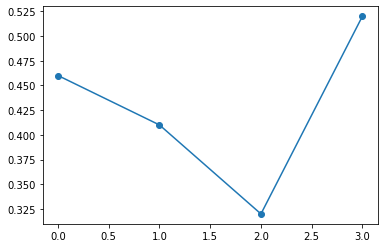

In [527]:
# plt.plot(error_test_smol)
plt.plot(error_test_big, '-o')
error_test_big[0]

3.63


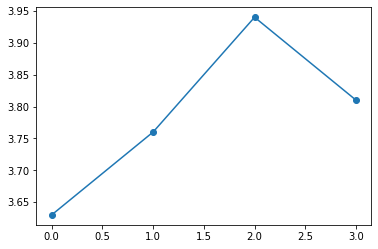

In [528]:
plt.plot(error_2013, '-o')
print(error_2013[0])

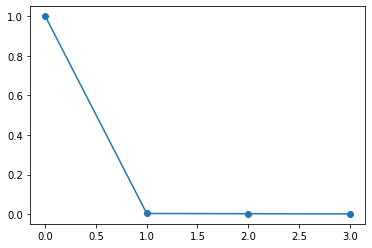

In [529]:
plt.plot(frac_PC, '-o')